In [1]:
import pandas as pd
from sqlalchemy import create_engine
import requests
import folium

In [2]:
bouy_meta = pd.read_xml("https://www.ndbc.noaa.gov/activestations.xml")

In [3]:
bouy_meta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1341 entries, 0 to 1340
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            1341 non-null   object 
 1   lat           1341 non-null   float64
 2   lon           1341 non-null   float64
 3   elev          1078 non-null   float64
 4   name          1306 non-null   object 
 5   owner         1341 non-null   object 
 6   pgm           1341 non-null   object 
 7   type          1341 non-null   object 
 8   met           1296 non-null   object 
 9   currents      1296 non-null   object 
 10  waterquality  1296 non-null   object 
 11  dart          1296 non-null   object 
 12  seq           45 non-null     float64
dtypes: float64(4), object(9)
memory usage: 136.3+ KB


In [4]:
bouy_meta

,id,lat,lon,elev,name,owner,pgm,type,met,currents,waterquality,dart,seq
0,0y2w3,44.794,-87.313,179.0,"Sturgeon Bay CG Station, WI",U.S.C.G. Marine Reporting Stations,IOOS Partners,fixed,n,n,n,n,NaN
1,13001,12.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,y,n,n,n,NaN
2,13002,21.000,-23.000,0.0,NE Extension,Prediction and Research Moored Array in the At...,International Partners,buoy,y,n,n,n,NaN
3,13008,15.000,-38.000,0.0,Reggae,Prediction and Research Moored Array in the At...,International Partners,buoy,y,n,n,n,NaN
4,13009,8.000,-38.000,0.0,Lambada,Prediction and Research Moored Array in the At...,International Partners,buoy,y,n,n,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1336,yata2,59.548,-139.733,NaN,"9453220 - Yakutat, Yakutat Bay, AK",NOS,NOS/CO-OPS,fixed,y,n,n,n,NaN
1337,ygnn6,43.262,-79.064,73.0,"Niagara Coast Guard Station, NY",NWS Eastern Region,IOOS Partners,fixed,y,n,n,n,NaN
1338,yktv2,37.227,-76.479,3.7,"8637689 - Yorktown USCG Training Center, VA",NOS,NOS/CO-OPS,fixed,y,n,n,n,NaN
1339,yrsv2,37.414,-76.712,11.0,"Taskinas Creek, Chesapeake Bay Reserve, VA",National Estuarine Research Reserve System,NERRS,fixed,y,n,n,n,NaN


In [5]:
bouy_meta[bouy_meta["lon"].between(-84,-55) 
          & bouy_meta["lat"].between(23,47)]

,id,lat,lon,elev,name,owner,pgm,type,met,currents,waterquality,dart,seq
88,41001,34.703,-72.242,0.0,EAST HATTERAS - 150 NM East of Cape Hatteras,NDBC,NDBC Meteorological/Ocean,buoy,n,n,n,n,NaN
89,41002,31.759,-74.936,0.0,SOUTH HATTERAS - 225 NM South of Cape Hatteras,NDBC,NDBC Meteorological/Ocean,other,y,n,n,n,NaN
90,41004,32.502,-79.099,0.0,"EDISTO - 41 NM Southeast of Charleston, SC",NDBC,NDBC Meteorological/Ocean,other,y,n,n,n,NaN
91,41008,31.400,-80.866,0.0,"GRAYS REEF - 40 NM Southeast of Savannah, GA",NDBC,NDBC Meteorological/Ocean,buoy,y,n,n,n,NaN
92,41009,28.508,-80.185,0.0,"CANAVERAL 20 NM East of Cape Canaveral, FL",NDBC,NDBC Meteorological/Ocean,buoy,y,n,n,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,wyss1,33.309,-79.289,NaN,"Winyah Bay Surface, North Inlet-Winyah Bay Res...",National Estuarine Research Reserve System,NERRS,fixed,n,n,y,n,NaN
1337,ygnn6,43.262,-79.064,73.0,"Niagara Coast Guard Station, NY",NWS Eastern Region,IOOS Partners,fixed,y,n,n,n,NaN
1338,yktv2,37.227,-76.479,3.7,"8637689 - Yorktown USCG Training Center, VA",NOS,NOS/CO-OPS,fixed,y,n,n,n,NaN
1339,yrsv2,37.414,-76.712,11.0,"Taskinas Creek, Chesapeake Bay Reserve, VA",National Estuarine Research Reserve System,NERRS,fixed,y,n,n,n,NaN


In [6]:
bouy_meta=bouy_meta[bouy_meta["lon"].between(-84,-55) 
                    & bouy_meta["lat"].between(23,47)]

m = folium.Map(location=[bouy_meta['lat'].iloc[0], bouy_meta['lon'].iloc[0]], zoom_start=5)

# Add markers for each location
for index, row in bouy_meta.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=row['name']
    ).add_to(m)

# Display the map
m

In [7]:
bouy_meta

,id,lat,lon,elev,name,owner,pgm,type,met,currents,waterquality,dart,seq
88,41001,34.703,-72.242,0.0,EAST HATTERAS - 150 NM East of Cape Hatteras,NDBC,NDBC Meteorological/Ocean,buoy,n,n,n,n,NaN
89,41002,31.759,-74.936,0.0,SOUTH HATTERAS - 225 NM South of Cape Hatteras,NDBC,NDBC Meteorological/Ocean,other,y,n,n,n,NaN
90,41004,32.502,-79.099,0.0,"EDISTO - 41 NM Southeast of Charleston, SC",NDBC,NDBC Meteorological/Ocean,other,y,n,n,n,NaN
91,41008,31.400,-80.866,0.0,"GRAYS REEF - 40 NM Southeast of Savannah, GA",NDBC,NDBC Meteorological/Ocean,buoy,y,n,n,n,NaN
92,41009,28.508,-80.185,0.0,"CANAVERAL 20 NM East of Cape Canaveral, FL",NDBC,NDBC Meteorological/Ocean,buoy,y,n,n,n,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1334,wyss1,33.309,-79.289,NaN,"Winyah Bay Surface, North Inlet-Winyah Bay Res...",National Estuarine Research Reserve System,NERRS,fixed,n,n,y,n,NaN
1337,ygnn6,43.262,-79.064,73.0,"Niagara Coast Guard Station, NY",NWS Eastern Region,IOOS Partners,fixed,y,n,n,n,NaN
1338,yktv2,37.227,-76.479,3.7,"8637689 - Yorktown USCG Training Center, VA",NOS,NOS/CO-OPS,fixed,y,n,n,n,NaN
1339,yrsv2,37.414,-76.712,11.0,"Taskinas Creek, Chesapeake Bay Reserve, VA",National Estuarine Research Reserve System,NERRS,fixed,y,n,n,n,NaN


In [11]:
from io import BytesIO
import io
import base64
from PIL import Image

In [ ]:
buffer = BytesIO()
img = m._to_png(5)
img = Image.open(io.BytesIO(img))
img.save(buffer, format="PNG")
image_data = base64.b64encode(buffer.getvalue())

# Convert the image to Markdown to preview it within Dagster
md_content = f"![img](data:image/png;base64,{image_data.decode()})"

In [15]:
img.save(buffer, format="PNG")
image_data = base64.b64encode(buffer.getvalue())

# Convert the image to Markdown to preview it within Dagster
md_content = f"![img](data:image/png;base64,{image_data.decode()})"

''
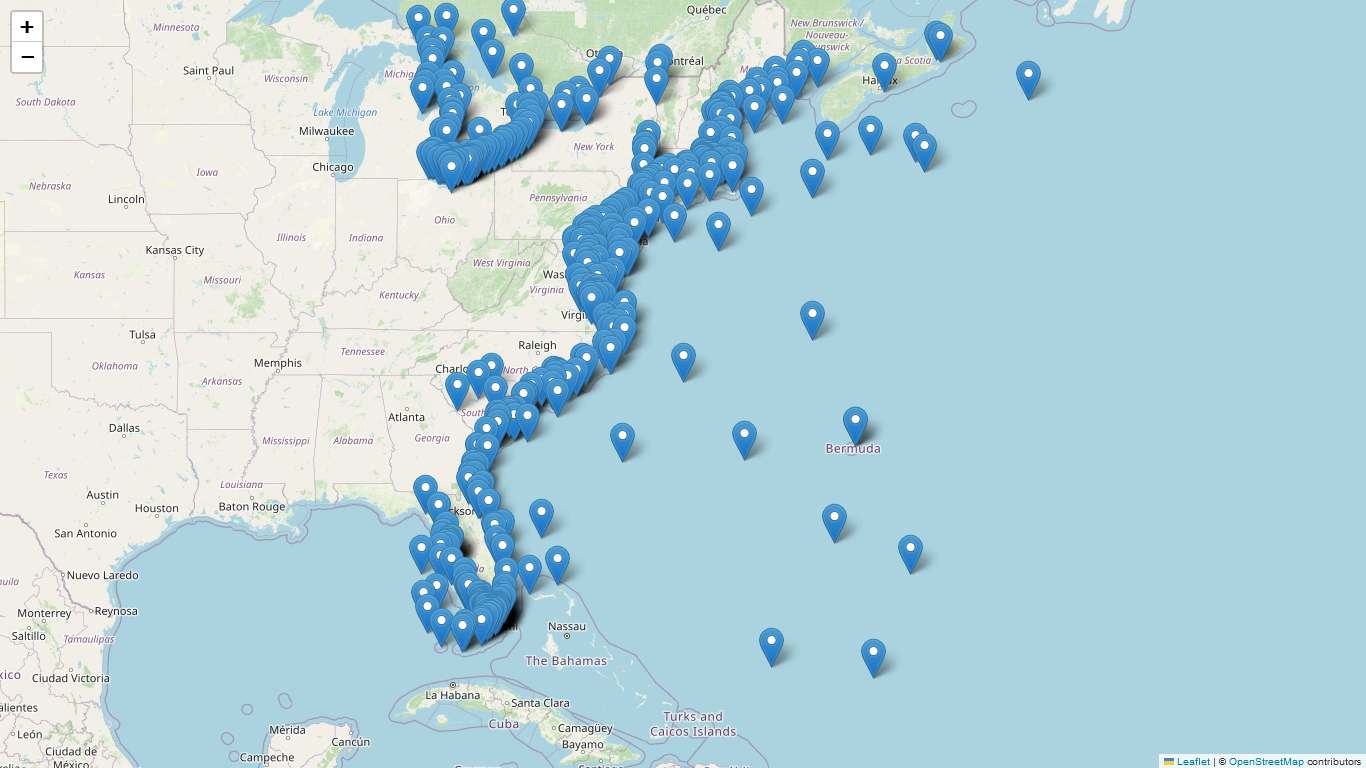

In [16]:
md_content